**Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy.

The project consists of 3 parts:
* First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
* Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
* Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.

# PART- 1 `( Data Cleaning )`
## Import libraries

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [99]:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [100]:
# Load json data
df = pd.read_json('scout_car.json', lines = True)

In [101]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [102]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,1.4 TDi Design S tronic,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,Sportback 1.6 TDI S-TRONIC S-LINE*NAVI|XENON*,Sportback 1.4 TDI admired S tronic,SPB 1.6 TDI S-tronic Metal plus + Xeno,SPORTBACK TFSI ULTRA 95 S-TRONIC AMB.
body_type,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Station wagon,Compact,Sedans,Sedans
price,15770,14500,14640,14500,16790,15090,16422,14480,16700,17990
vat,VAT deductible,Price negotiable,VAT deductible,None,None,None,VAT deductible,VAT deductible,None,None
km,"56,013 km","80,000 km","83,450 km","73,000 km","16,200 km","63,668 km","62,111 km","14,986 km","57,000 km","16,103 km"
registration,01/2016,03/2017,02/2016,08/2016,05/2016,02/2016,03/2016,02/2016,02/2016,06/2017
prev_owner,2 previous owners,None,1 previous owner,1 previous owner,1 previous owner,1 previous owner,1 previous owner,1 previous owner,1 previous owner,None
kW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
#PErcent of Null Values
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)

kW                               100.000000
Last Timing Belt Service Date     99.899491
Electricity consumption           99.139393
Available from                    98.291350
Last Service Date                 96.444500
Availability                      96.011056
Other Fuel Types                  94.472015
Next Inspection                   77.793831
Inspection new                    75.299956
Emission Label                    74.967021
Model Code                        68.729192
Non-smoking Vehicle               54.915510
Country version                   52.346253
Full Service                      48.395000
Weight                            43.809285
Drive chain                       43.080596
prev_owner                        42.892141
Previous Owners                   41.711163
Paint Type                        36.258559
Cylinders                         35.680633
Warranty                          34.047365
Gears                             29.599849
vat                             

Below columns contain %70 or higher NULL values,as well as meaningles or reduntant columns were dropped from dataset. I created new data frame named df_car and add each clean, meaningful columns in it.

 
 - url
 - kW
 - Model Code
 - Emission Label
 - Electricity consumption
 - Last Service Date
 - Other Fuel Types
 - Availability
 - Last Timing Belt Service Date
 - Available from
 - Model Code
 - Make
 - Model
 - short_description
 - description
 - null
 - Next Inspection
 - Inspection new

 - Body original color
 - Full Service
 - Non smoking vehicle
 - Offer number
 - Body
 - Emission class


In [104]:
df.drop(["kW", "url", "Model Code","Emission Label","Make","Model","short_description","description","null","Next Inspection","Inspection new"], axis=1, inplace=True)

## `make_model`

In [105]:
df_car = pd.DataFrame()
df_car["make_model"] = df.make_model

## `body_type`

In [106]:
df['body_type'].value_counts(dropna= False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [107]:
df_car['body_type'] = df['body_type']

## `price` (Target Feature)

In [108]:
df['price'].value_counts()


14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
31940      1
15540      1
21649      1
27790      1
34815      1
Name: price, Length: 2956, dtype: int64

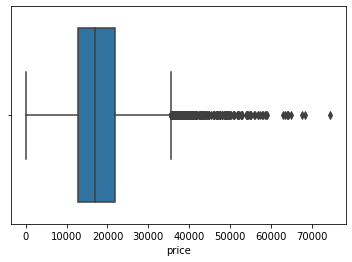

In [109]:
sns.boxplot(df['price']);

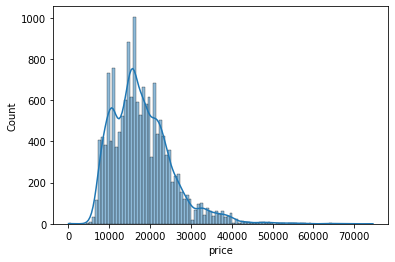

In [110]:
sns.histplot(df.price,kde=True);

In [111]:
df_car['price'] = df['price']

## `vat`
The Value Added Tax, or VAT, in the European Union is a general, broadly based consumption tax assessed on the value added to goods and services.

In [112]:
df['vat'].value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [113]:
df.groupby("vat")["make_model"].value_counts(dropna=False)

vat               make_model    
Price negotiable  Audi A3            101
                  Audi A1             81
                  Renault Clio        74
                  Opel Insignia       50
                  Opel Astra          45
                  Opel Corsa          41
                  Renault Espace      34
VAT deductible    Audi A3           2209
                  Opel Insignia     1980
                  Opel Astra        1828
                  Audi A1           1774
                  Opel Corsa        1607
                  Renault Clio       984
                  Renault Espace     581
                  Renault Duster      16
                  Audi A2              1
Name: make_model, dtype: int64

In [114]:
df_car['vat'] = df['vat']

## `km`

In [115]:
df['km'].value_counts(dropna=False)

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
32,779 km       1
23,214 km       1
21,488 km       1
18,750 km       1
84,460 km       1
Name: km, Length: 6690, dtype: int64

In [116]:
df.km = df.km.str.replace(" km", "")
df.km = df.km.str.replace(",", "")
df.km[df.km == "-"] = np.nan

In [117]:
df.km

0        56013
1        80000
2        83450
3        73000
4        16200
         ...  
15914      NaN
15915     9900
15916       15
15917       10
15918      NaN
Name: km, Length: 15919, dtype: object

In [118]:
# Because of NaN's, we have to convert float, not int at this time.
df_car['km'] = df['km'].astype('float')

In [119]:
df_car.km

0        56013.0
1        80000.0
2        83450.0
3        73000.0
4        16200.0
          ...   
15914        NaN
15915     9900.0
15916       15.0
15917       10.0
15918        NaN
Name: km, Length: 15919, dtype: float64

## `registration`

In [120]:
df.registration.value_counts(dropna=False)[:10]

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
04/2018     541
01/2019     541
02/2018     539
03/2016     536
06/2018     532
Name: registration, dtype: int64

In [121]:
df.registration[df.registration == "-/-"] = np.nan

In [122]:
df['registration'].value_counts(dropna=False)[:10]

NaN        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
Name: registration, dtype: int64

In [123]:
df_car["car_age"] = 2019 - df.registration.str.split('/').str[1].astype('float')

In [124]:
df_car.car_age

0        3.0
1        2.0
2        3.0
3        3.0
4        3.0
        ... 
15914    NaN
15915    0.0
15916    0.0
15917    0.0
15918    0.0
Name: car_age, Length: 15919, dtype: float64

## `prev_owner`

In [125]:
df['prev_owner'].value_counts(dropna=False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [126]:
df['prev_owner'].str.extract('(\d)')


,0
0,2
1,NaN
2,1
3,1
4,1
...,...
15914,NaN
15915,1
15916,1
15917,NaN


In [127]:
df_car['prev_owner'] = df['prev_owner'].str.extract('(\d)')


In [128]:
df_car['prev_owner'].value_counts(dropna=False)

1      8294
NaN    6828
2       778
3        17
4         2
Name: prev_owner, dtype: int64

## `hp`

Horse Power

In [129]:
df['hp'].value_counts(dropna=False)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
          ... 
123 kW       1
163 kW       1
115 kW       1
133 kW       1
84 kW        1
Name: hp, Length: 81, dtype: int64

In [130]:
df.hp.isnull().sum()

0

In [131]:
df['hp'].str.extract('(\d{1,3})')[0]

0         66
1        141
2         85
3         66
4         66
        ... 
15914    147
15915    165
15916    146
15917    147
15918    165
Name: 0, Length: 15919, dtype: object

In [132]:
df_car['horse_power'] = df['hp'].str.extract('(\d{1,3})')[0]
df_car['horse_power'].value_counts(dropna=False)

85     2542
66     2122
81     1402
100    1308
110    1112
       ... 
9         1
137       1
123       1
84        1
132       1
Name: horse_power, Length: 81, dtype: int64

## `First Registration`

In [133]:
df["First Registration"].sample(5)

8030                NaN
4516                NaN
8946     [\n, 2016, \n]
13698    [\n, 2016, \n]
9866     [\n, 2019, \n]
Name: First Registration, dtype: object

In [134]:
df["First Registration"].str[1].value_counts(dropna=False)

2018    4522
2016    3674
2017    3273
2019    2853
NaN     1597
Name: First Registration, dtype: int64

In [135]:
df_car["car_age_2"] = 2019 - df["First Registration"].str[1].astype(float)

In [136]:
df_car[(df_car.car_age != df_car.car_age_2)][["car_age","car_age_2"]].isnull().sum()

car_age      1597
car_age_2    1597
dtype: int64

In [137]:
df_car.car_age.isnull().sum()

1597

"car_age" and "car_age_2" columns are same so drop "car_age_2"

In [138]:
df_car.drop(columns="car_age_2",inplace=True)

## `Body Color`

In [139]:
df['Body Color'].sample(5)

1123     [\n, Grey, \n]
9273     [\n, Blue, \n]
5572    [\n, Black, \n]
3987    [\n, White, \n]
3072    [\n, Black, \n]
Name: Body Color, dtype: object

In [140]:
df['Body Color'].str[1].value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body Color, dtype: int64

In [141]:
df_car["color"] = df['Body Color'].str[1]
df_car.sample(5)

,make_model,body_type,price,vat,km,car_age,prev_owner,horse_power,color
1795,Audi A1,Sedans,16900,VAT deductible,20951.0,1.0,1,85,White
93,Audi A1,Compact,18444,VAT deductible,50066.0,3.0,1,92,Grey
9813,Opel Corsa,Sedans,9880,VAT deductible,26001.0,1.0,NaN,51,Grey
4557,Audi A3,Sedans,23500,VAT deductible,7778.0,1.0,NaN,85,Silver
1874,Audi A1,Compact,16800,None,14364.0,1.0,NaN,70,Grey


## `Paint Type`

In [156]:
df['Paint Type'].sample(10)

13154               NaN
1205     [\nMetallic\n]
12436    [\nMetallic\n]
11248    [\nMetallic\n]
9071     [\nMetallic\n]
6851     [\nMetallic\n]
5449     [\nMetallic\n]
7662     [\nMetallic\n]
14290    [\nMetallic\n]
11656               NaN
Name: Paint Type, dtype: object

In [157]:
df['Paint Type'] = [item[0] if type(item) == list else item for item in df['Paint Type']]
df_car["paint_type"] = df['Paint Type'].str.extract("\\n(\w+)")
df_car


,make_model,body_type,price,vat,km,car_age,prev_owner,horse_power,color,paint_type
0,Audi A1,Sedans,15770,VAT deductible,56013.0,3.0,2,66,Black,Metallic
1,Audi A1,Sedans,14500,Price negotiable,80000.0,2.0,NaN,141,Red,NaN
2,Audi A1,Sedans,14640,VAT deductible,83450.0,3.0,1,85,Black,Metallic
3,Audi A1,Sedans,14500,None,73000.0,3.0,1,66,Brown,Metallic
4,Audi A1,Sedans,16790,None,16200.0,3.0,1,66,Black,Metallic
...,...,...,...,...,...,...,...,...,...,...
15914,Renault Espace,Van,39950,VAT deductible,NaN,NaN,NaN,147,Grey,Metallic
15915,Renault Espace,Van,39885,VAT deductible,9900.0,0.0,1,165,Grey,Metallic
15916,Renault Espace,Van,39875,VAT deductible,15.0,0.0,1,146,White,NaN
15917,Renault Espace,Van,39700,VAT deductible,10.0,0.0,NaN,147,Grey,NaN


In [158]:
df_car.paint_type.value_counts(dropna=False)

Metallic    9794
NaN         5772
Uni          347
Perl           6
Name: paint_type, dtype: int64

## `Body Color Original`

In [161]:
df['Body Color Original'][10:15]

10                       [\nNero\n]
11     [\nFlorettsilber Metallic\n]
12    [\nGletscherweiss Metallic\n]
13                 [\nGris Clair\n]
14     [\nMythosschwarz Metallic\n]
Name: Body Color Original, dtype: object

In [162]:
df['Body Color Original'] = [item[0] if type(item) == list else item for item in df['Body Color Original']]
df["Body Color Original"].value_counts(dropna=False)

NaN                                   3759
\nOnyx Schwarz\n                       338
\nBianco\n                             282
\nMythosschwarz Metallic\n             238
\nBrillantschwarz\n                    216
                                      ... 
\nPowerrot\n                             1
\nArubablau\n                            1
\nVerschiedene fareben lieferbar\n       1
\nGRIGIO MONSONE MET\n                   1
\nLichtsilber\n                          1
Name: Body Color Original, Length: 1928, dtype: int64

In [163]:
df[ df['Body Color Original'].notnull() & df["Body Color"].isnull()][['Body Color Original',"Body Color"]].sample(10)

,Body Color Original,Body Color
14526,\nwählbar\n,NaN
4581,\nwählbar\n,NaN
12966,\nwählbar - ggf gegen Aufpreis\n,NaN
11618,\nFlip Chip met.\n,NaN
7779,\nwählbar - ggf. mit Aufpreis\n,NaN
10367,\nwählbar\n,NaN
12739,\nwählbar - ggf gegen Aufpreis\n,NaN
12740,\nwählbar - ggf. mit Aufpreis\n,NaN
11941,\nwählbar - ggf gegen Aufpreis\n,NaN
12523,\nwählbar - ggf. mit Aufpreis\n,NaN


Checking for null paint type and campare with original paint 

In [164]:
df[ df['Body Color Original'].notnull() 
    & df["Paint Type"].isnull() & 
    df['Body Color Original'].str.contains("[M,m]etalli[c,k]") ][['Body Color Original',"Paint Type"] ]

,Body Color Original,Paint Type
12180,\nMetallic gegen Aufpreis\n,NaN
12701,\nMetallic gegen Aufpreis\n,NaN
12730,\nMetallic gegen Aufpreis\n,NaN
12976,\nMetallic gegen Aufpreis\n,NaN
12990,\nMetallic gegen Aufpreis\n,NaN
13014,\nMetallic gegen Aufpreis\n,NaN


Drop column "Body Color Original". Don't save at df_car

## `Gears`

In [165]:
df["Gears"] = [item[0] if type(item) == list else item for item in df['Gears']]
df_car["gears"] = df.Gears.str.extract("(\d)")
df_car


,make_model,body_type,price,vat,km,car_age,prev_owner,horse_power,color,paint_type,gears
0,Audi A1,Sedans,15770,VAT deductible,56013.0,3.0,2,66,Black,Metallic,NaN
1,Audi A1,Sedans,14500,Price negotiable,80000.0,2.0,NaN,141,Red,NaN,7
2,Audi A1,Sedans,14640,VAT deductible,83450.0,3.0,1,85,Black,Metallic,NaN
3,Audi A1,Sedans,14500,None,73000.0,3.0,1,66,Brown,Metallic,6
4,Audi A1,Sedans,16790,None,16200.0,3.0,1,66,Black,Metallic,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault Espace,Van,39950,VAT deductible,NaN,NaN,NaN,147,Grey,Metallic,6
15915,Renault Espace,Van,39885,VAT deductible,9900.0,0.0,1,165,Grey,Metallic,7
15916,Renault Espace,Van,39875,VAT deductible,15.0,0.0,1,146,White,NaN,6
15917,Renault Espace,Van,39700,VAT deductible,10.0,0.0,NaN,147,Grey,NaN,6


In [166]:
df_car['gears'] = df_car['gears'].astype('float')

## `Safety & Security`

In [167]:
df['\nSafety & Security\n']

0        [ABS, Central door lock, Daytime running light...
1        [ABS, Central door lock, Central door lock wit...
2        [ABS, Central door lock, Daytime running light...
3        [ABS, Alarm system, Central door lock with rem...
4        [ABS, Central door lock, Driver-side airbag, E...
                               ...                        
15914    [ABS, Central door lock, Central door lock wit...
15915    [ABS, Adaptive Cruise Control, Blind spot moni...
15916    [ABS, Adaptive Cruise Control, Blind spot moni...
15917    [ABS, Blind spot monitor, Driver-side airbag, ...
15918    [ABS, Blind spot monitor, Daytime running ligh...
Name: \nSafety & Security\n, Length: 15919, dtype: object

In [168]:
df_car["safety_security"] = [ ",".join(item).lower() if type(item) == list else  item for item in df["\nSafety & Security\n"] ]

In [169]:
df_car["safety_security"].value_counts()

abs,central door lock,daytime running lights,driver-side airbag,electronic stability control,fog lights,immobilizer,isofix,passenger-side airbag,power steering,side airbag,tire pressure monitoring system,traction control                                               538
abs,central door lock,daytime running lights,driver-side airbag,electronic stability control,immobilizer,isofix,passenger-side airbag,power steering,side airbag,tire pressure monitoring system,traction control                                                          480
abs,central door lock,daytime running lights,driver-side airbag,electronic stability control,immobilizer,isofix,passenger-side airbag,power steering,side airbag,tire pressure monitoring system,traction control,xenon headlights                                         275
abs,central door lock,daytime running lights,driver-side airbag,electronic stability control,fog lights,immobilizer,isofix,led daytime running lights,passenger-side airbag,power steering,

## `Country version`

In [171]:
df['Country version'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     8333
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nBulgaria\n]             2
[\nRomania\n]              2
[\nEgypt\n]                1
[\nSerbia\n]               1
[\nLuxembourg\n]           1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
Name: Country version, dtype: int64

In [172]:
df_car['country_version'] = [item[0] if type(item) == list else item for item in df['Country version']]
df_car['country_version'] = df_car['country_version'].str.extract('(\w+)')

## `Type`

In [173]:
df.Type.isnull().sum()

2

In [175]:
df['Type'].sample(10)

1646                                  [, Used, , Gasoline]
11974              [, Used, , Diesel (Particulate Filter)]
5062     [, Pre-registered, , Diesel (Particulate Filter)]
2490                         [, Demonstration, , Super 95]
7407     [, Employee's car, , Diesel (Particulate Filter)]
10703              [, Used, , Diesel (Particulate Filter)]
8292                                  [, Used, , Gasoline]
4935               [, Used, , Diesel (Particulate Filter)]
9371                                  [, Used, , Gasoline]
10126                        [, Demonstration, , Super 95]
Name: Type, dtype: object

In [176]:
df_car["type"] = df.Type.str[1]
df_car['type'].value_counts(dropna = False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

## `Warranty`

In [187]:
df['Warranty'].sample(10)

10185    [\n72 months\n, \n129 g CO2/km (comb)\n]
866                                 \n24 months\n
1764             [\n, \n, \n97 g CO2/km (comb)\n]
7346                         [\n, \n, \nEuro 6\n]
15737                     [\n, \n, \n4 (Green)\n]
6623                                          NaN
6897                                          NaN
171                                 \n12 months\n
7097                         [\n, \n, \nEuro 6\n]
11292           [\n, \n, \n137 g CO2/km (comb)\n]
Name: Warranty, dtype: object

In [188]:
df_car["warranty"] = df.Warranty.apply(lambda x : x[0] if type(x)==list else x)

In [189]:
df_car["warranty"].sample(5)

6413                \n
8542     \n12 months\n
14232     \n6 months\n
12416    \n24 months\n
14190               \n
Name: warranty, dtype: object

In [190]:
df_car["warranty"] = df_car.warranty.str.strip("\n").str.extract('(\d{1,2})')[0].astype("float")

In [191]:
df_car.warranty.value_counts(dropna=False)

NaN     11066
12.0     2594
24.0     1118
60.0      401
36.0      279
48.0      149
6.0       125
72.0       59
3.0        33
23.0       11
18.0       10
20.0        7
25.0        6
2.0         5
50.0        4
26.0        4
16.0        4
19.0        3
1.0         3
4.0         3
13.0        3
34.0        3
45.0        2
14.0        2
17.0        2
11.0        2
46.0        2
28.0        2
21.0        2
22.0        2
9.0         2
30.0        1
33.0        1
56.0        1
40.0        1
7.0         1
15.0        1
8.0         1
10.0        1
49.0        1
47.0        1
65.0        1
Name: warranty, dtype: int64

## `Previous Owner`

In [198]:
df['Previous Owners'].sample(10)

13227                                 NaN
890                                   NaN
11999    [\n1\n, \n150 g CO2/km (comb)\n]
12400                                 NaN
9982                                \n1\n
3095                                \n2\n
196                                 \n1\n
8504                                \n1\n
14387                               \n1\n
4972                                \n1\n
Name: Previous Owners, dtype: object

In [199]:
df_car['previous_owner'] = [x[0] if type(x) == list else x for x in df['Previous Owners']]

In [200]:
df_car['previous_owner'][:10]

0    \n2\n
1      NaN
2    \n1\n
3    \n1\n
4    \n1\n
5    \n1\n
6    \n1\n
7    \n1\n
8    \n1\n
9      NaN
Name: previous_owner, dtype: object

In [204]:
df_car['previous_owner'] = df_car['previous_owner'].str.strip().astype('float')

In [205]:
df_car['previous_owner'][:10]

0    2.0
1    NaN
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    NaN
Name: previous_owner, dtype: float64

## `Upholstery`

In [206]:
df["Upholstery"].sample(5)

15600    [\nCloth, Black\n]
2396     [\nCloth, Black\n]
8274     [\nCloth, Black\n]
10947           [\nCloth\n]
5315                    NaN
Name: Upholstery, dtype: object

In [207]:
df_car["upholstery"]= [item[0] if type(item) == list else item for item in df["Upholstery"]] 


In [208]:
df_car['upholstery']

0               \nCloth, Black\n
1                \nCloth, Grey\n
2               \nCloth, Black\n
3                            NaN
4               \nCloth, Black\n
                  ...           
15914                        NaN
15915                  \nCloth\n
15916    \nFull leather, Black\n
15917           \nPart leather\n
15918    \nFull leather, Brown\n
Name: upholstery, Length: 15919, dtype: object

In [209]:
df_car["upholstery"]= df_car["upholstery"].str[1:].str.split(",").str[0].str.strip()

In [210]:
df_car["upholstery"]

0               Cloth
1               Cloth
2               Cloth
3                 NaN
4               Cloth
             ...     
15914             NaN
15915           Cloth
15916    Full leather
15917    Part leather
15918    Full leather
Name: upholstery, Length: 15919, dtype: object

## `Nr. of Doors`

In [211]:
df['Nr. of Doors']

0        [\n5\n]
1        [\n3\n]
2        [\n4\n]
3        [\n3\n]
4        [\n5\n]
          ...   
15914    [\n5\n]
15915    [\n5\n]
15916    [\n5\n]
15917    [\n5\n]
15918    [\n5\n]
Name: Nr. of Doors, Length: 15919, dtype: object

In [215]:
df_car["nr_of_doors"] = df["Nr. of Doors"].astype('str').str.extract('(\d)').astype(float)
df_car["nr_of_doors"].value_counts(dropna=False)

5.0    11575
4.0     3079
3.0      832
2.0      219
NaN      212
7.0        1
1.0        1
Name: nr_of_doors, dtype: int64

## `Nr. of Seats`

In [216]:
df["Nr. of Seats"]

0        [\n5\n]
1        [\n4\n]
2        [\n4\n]
3        [\n4\n]
4        [\n5\n]
          ...   
15914    [\n5\n]
15915    [\n5\n]
15916    [\n7\n]
15917    [\n7\n]
15918    [\n5\n]
Name: Nr. of Seats, Length: 15919, dtype: object

In [217]:
df_car["nr_of_seats"] = df["Nr. of Seats"].astype('str').str.extract('(\d)').astype(float)
df_car["nr_of_seats"].value_counts(dropna=False)

5.0    13336
4.0     1125
NaN      977
7.0      362
2.0      116
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64

## `Gearing Type`

In [218]:
df['Gearing Type'].sample(10)

12362            [\n, Manual, \n]
5002          [\n, Automatic, \n]
1367             [\n, Manual, \n]
46               [\n, Manual, \n]
8169             [\n, Manual, \n]
13136         [\n, Automatic, \n]
4699          [\n, Automatic, \n]
2710          [\n, Automatic, \n]
3607     [\n, Semi-automatic, \n]
15021         [\n, Automatic, \n]
Name: Gearing Type, dtype: object

In [220]:
df_car["gearing_type"] = df["Gearing Type"].str[1]
df_car["gearing_type"].value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: gearing_type, dtype: int64

## `Displacement`

In [221]:
df["Displacement"]

0        [\n1,422 cc\n]
1        [\n1,798 cc\n]
2        [\n1,598 cc\n]
3        [\n1,422 cc\n]
4        [\n1,422 cc\n]
              ...      
15914    [\n1,997 cc\n]
15915    [\n1,798 cc\n]
15916    [\n1,997 cc\n]
15917    [\n1,997 cc\n]
15918    [\n1,798 cc\n]
Name: Displacement, Length: 15919, dtype: object

In [222]:
df_car["displacement"] = df["Displacement"].str[0].str.replace('(/^\D+/g)', '').str.strip()

In [223]:
df_car["displacement"]

0        1,422 cc
1        1,798 cc
2        1,598 cc
3        1,422 cc
4        1,422 cc
           ...   
15914    1,997 cc
15915    1,798 cc
15916    1,997 cc
15917    1,997 cc
15918    1,798 cc
Name: displacement, Length: 15919, dtype: object

In [224]:
df_car["displacement"] = df_car["displacement"].str.replace(',','')

In [225]:
df_car["displacement"] = df_car["displacement"].str.replace(' cc','')

In [226]:
df_car['displacement'] = df_car['displacement'].astype('float')
df_car["displacement"] = round(df_car.displacement / 100)*100

In [228]:
df_car['displacement'].value_counts(dropna=False)

1600.0     5115
1400.0     3060
1000.0     2558
1500.0     1409
2000.0     1164
1200.0     1164
NaN         496
900.0       372
1100.0      289
1800.0      211
0.0          38
2500.0       20
100.0         7
200.0         6
1300.0        3
1900.0        2
1700.0        2
15900.0       1
3000.0        1
16000.0       1
Name: displacement, dtype: int64

## `Cylinders`

In [230]:
df["Cylinders"]

0        [\n3\n]
1        [\n4\n]
2            NaN
3        [\n3\n]
4        [\n3\n]
          ...   
15914    [\n4\n]
15915    [\n4\n]
15916    [\n4\n]
15917    [\n4\n]
15918    [\n4\n]
Name: Cylinders, Length: 15919, dtype: object

In [231]:
df_car['cylinders'] = df["Cylinders"].str[0].str.split("/").str[0].str.strip().astype(float)
df_car['cylinders']

0        3.0
1        4.0
2        NaN
3        3.0
4        3.0
        ... 
15914    4.0
15915    4.0
15916    4.0
15917    4.0
15918    4.0
Name: cylinders, Length: 15919, dtype: float64

## `Weight`

In [232]:
df['Weight']

0        [\n1,220 kg\n]
1        [\n1,255 kg\n]
2                   NaN
3        [\n1,195 kg\n]
4                   NaN
              ...      
15914    [\n1,758 kg\n]
15915    [\n1,708 kg\n]
15916               NaN
15917    [\n1,758 kg\n]
15918    [\n1,685 kg\n]
Name: Weight, Length: 15919, dtype: object

In [233]:
df_car["weight_kg"] = df.Weight.str[0].str.strip('\n').str.replace(',','').str.extract('(\d{1,6})')[0].astype('float')
df_car["weight_kg"] 

0        1220.0
1        1255.0
2           NaN
3        1195.0
4           NaN
          ...  
15914    1758.0
15915    1708.0
15916       NaN
15917    1758.0
15918    1685.0
Name: weight_kg, Length: 15919, dtype: float64

## `Drive chain`

In [234]:
df["Drive chain"]

0        [\nfront\n]
1        [\nfront\n]
2        [\nfront\n]
3                NaN
4        [\nfront\n]
            ...     
15914    [\nfront\n]
15915    [\nfront\n]
15916    [\nfront\n]
15917    [\nfront\n]
15918      [\n4WD\n]
Name: Drive chain, Length: 15919, dtype: object

In [236]:
df_car['drive_chain'] = df['Drive chain'].str[0].str.strip('\n')
df_car['drive_chain'].value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

## `Fuel`

In [237]:
benzine = ["Gasoline", "Super 95","Regular","Super E10 95","Super Plus 98","Super Plus E10 98", "Others"]
lpg = ["LPG","Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]
def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in lpg:
        return "LPG/CNG"
    else:
        return x

In [238]:
df["Fuel"] = df.Fuel.str[1].str.split("/").str[0].str.strip()

In [239]:
df['Fuel']

0        Diesel (Particulate Filter)
1                           Gasoline
2        Diesel (Particulate Filter)
3        Diesel (Particulate Filter)
4        Diesel (Particulate Filter)
                    ...             
15914    Diesel (Particulate Filter)
15915                       Super 95
15916                         Diesel
15917                         Diesel
15918                       Super 95
Name: Fuel, Length: 15919, dtype: object

In [240]:
df["Fuel"] = df.Fuel.str.split("(").str[0].str.strip()

In [241]:
df["Fuel"]

0          Diesel
1        Gasoline
2          Diesel
3          Diesel
4          Diesel
           ...   
15914      Diesel
15915    Super 95
15916      Diesel
15917      Diesel
15918    Super 95
Name: Fuel, Length: 15919, dtype: object

In [242]:
df_car['fuel'] = df.Fuel.apply(fueltype)
df_car['fuel']

0         Diesel
1        Benzine
2         Diesel
3         Diesel
4         Diesel
          ...   
15914     Diesel
15915    Benzine
15916     Diesel
15917     Diesel
15918    Benzine
Name: fuel, Length: 15919, dtype: object

## `Consumption`

In [243]:
df['Consumption']

0        [[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...
1        [[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...
2        [[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...
3        [[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...
4        [[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...
                               ...                        
15914    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
15915    [\n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (ci...
15916    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
15917    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
15918    [[6.8 l/100 km (comb)], [8.7 l/100 km (city)],...
Name: Consumption, Length: 15919, dtype: object

In [244]:
df["co"] = df["Consumption"].astype("string").fillna("")
df['co']

0        [['3.8 l/100 km (comb)'], ['4.3 l/100 km (city...
1        [['5.6 l/100 km (comb)'], ['7.1 l/100 km (city...
2        [['3.8 l/100 km (comb)'], ['4.4 l/100 km (city...
3        [['3.8 l/100 km (comb)'], ['4.3 l/100 km (city...
4        [['4.1 l/100 km (comb)'], ['4.6 l/100 km (city...
                               ...                        
15914    [['5.3 l/100 km (comb)'], ['6.2 l/100 km (city...
15915    ['\n', '7.4 l/100 km (comb)', '\n', '9.2 l/100...
15916    [['5.3 l/100 km (comb)'], ['6.2 l/100 km (city...
15917    [['5.3 l/100 km (comb)'], ['6.2 l/100 km (city...
15918    [['6.8 l/100 km (comb)'], ['8.7 l/100 km (city...
Name: co, Length: 15919, dtype: string

In [245]:
df["consump_comb"] = df.co.apply(lambda i: re.findall("\d\D\d l/100 km \Wcomb", i))
df["consump_comb"] = df["consump_comb"].apply(lambda x: x[0][0:3] if not x==[] else x)
df["consump_comb"] = pd.to_numeric(df["consump_comb"])

In [246]:
df_car["consump_comb"] = df["consump_comb"]

In [247]:
df["consump_city"] = df.co.apply(lambda i: re.findall("\d\D\d l/100 km \Wcity", i))
df["consump_city"] = df["consump_city"].apply(lambda x: x[0][0:3] if not x==[] else x)
df["consump_city"] = pd.to_numeric(df["consump_city"])

In [248]:
df_car['consump_city'] = df["consump_city"]

In [249]:
df["consump_country"] = df.co.apply(lambda i: re.findall("\d\D\d l/100 km \Wcountry", i))
df["consump_country"] = df["consump_country"].apply(lambda x: x[0][0:3] if not x==[] else x)
df["consump_country"] = pd.to_numeric(df["consump_country"])

In [250]:
df_car["consump_country"] = df["consump_country"]

In [251]:
df["co2"] = df["CO2 Emission"].astype("string").fillna("")

In [252]:
df["co2"] = df["co2"].replace(",", "")

In [253]:
df["co2"] = df["co2"].str.extract('(\d+)')

In [254]:
df_car['co2_cons'] = df["co2"]

In [255]:
df_car.rename(columns={'co2_cons':'co2_emission'},inplace=True)

## `Emission Class`

In [256]:
df['Emission Class']
#Dropping

0              [\nEuro 6\n]
1              [\nEuro 6\n]
2              [\nEuro 6\n]
3              [\nEuro 6\n]
4              [\nEuro 6\n]
                ...        
15914                   NaN
15915                   NaN
15916    [\nEuro 6d-TEMP\n]
15917          [\nEuro 6\n]
15918          [\nEuro 6\n]
Name: Emission Class, Length: 15919, dtype: object

## `\nComfort & Convenience\n`

In [257]:
df['\nComfort & Convenience\n'] = [','.join(item) if type(item) == list else item for item in df['\nComfort & Convenience\n']]

In [258]:
df_car['comfort_convenience'] = df['\nComfort & Convenience\n']


## `\nEntertainment & Media\n`

In [259]:
df['\nEntertainment & Media\n'] = [','.join(item) if type(item) == list else item for item in df['\nEntertainment & Media\n']]
df_car['media'] = df['\nEntertainment & Media\n']

## `\nExtras\n`

In [260]:
df['\nExtras\n'] = [','.join(item) if type(item) == list else item for item in df['\nExtras\n']]
df_car['extras'] = df['\nExtras\n']

## Final touch

In [265]:
df_car.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'car_age',
       'prev_owner', 'horse_power', 'color', 'paint_type', 'gears',
       'safety_security', 'country_version', 'type', 'warranty',
       'previous_owner', 'upholstery', 'nr_of_doors', 'nr_of_seats',
       'gearing_type', 'displacement', 'cylinders', 'weight_kg', 'drive_chain',
       'fuel', 'consump_comb', 'consump_city', 'consump_country',
       'co2_emission', 'comfort_convenience', 'media', 'extras'],
      dtype='object')

In [266]:
df_car.T

,0,1,2,3,4,5,6,7,8,9,...,15909,15910,15911,15912,15913,15914,15915,15916,15917,15918
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,...,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace
body_type,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Station wagon,Compact,Sedans,Sedans,...,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van
price,15770,14500,14640,14500,16790,15090,16422,14480,16700,17990,...,39990,39980,39980,39950,39950,39950,39885,39875,39700,40999
vat,VAT deductible,Price negotiable,VAT deductible,None,None,None,VAT deductible,VAT deductible,None,None,...,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible
km,56013.0,80000.0,83450.0,73000.0,16200.0,63668.0,62111.0,14986.0,57000.0,16103.0,...,3500.0,8500.0,100.0,NaN,1000.0,NaN,9900.0,15.0,10.0,NaN
car_age,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0
prev_owner,2,NaN,1,1,1,1,1,1,1,NaN,...,NaN,1,1,NaN,NaN,NaN,1,1,NaN,1
horse_power,66,141,85,66,66,85,85,66,85,70,...,147,165,118,147,165,147,165,146,147,165
color,Black,Red,Black,Brown,Black,White,White,Red,Grey,White,...,Black,Blue,White,Black,White,Grey,Grey,White,Grey,Grey
paint_type,Metallic,NaN,Metallic,Metallic,Metallic,Metallic,Metallic,Metallic,Metallic,NaN,...,Metallic,Metallic,Metallic,Metallic,Metallic,Metallic,Metallic,NaN,NaN,Metallic


In [267]:
df_car.to_csv('df_car_cleaned.csv',index=False)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     15919 non-null  object 
 1   body_type                      15859 non-null  object 
 2   price                          15919 non-null  int64  
 3   vat                            11406 non-null  object 
 4   km                             14895 non-null  object 
 5   registration                   14322 non-null  object 
 6   prev_owner                     9091 non-null   object 
 7   hp                             15919 non-null  object 
 8   Type                           15917 non-null  object 
 9   Previous Owners                9279 non-null   object 
 10  Warranty                       10499 non-null  object 
 11  Full Service                   8215 non-null   object 
 12  Non-smoking Vehicle            7177 non-null  